We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1. Similar to fire escape, it may be hard to use this restaurant because of the fact that we only have google reviews AFTER the restaurant became popular.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [2]:
data = pd.read_csv('data/red-hook-food-corp/csv/detailed-reviews-of-red-hook-food-corp.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Red Hook Food Corp,2,Its the worst place ever,2024-02-18 17:15:04.848373
1,Red Hook Food Corp,3,Got the Philly on a Jamaican patty. I expected...,2024-02-11 17:15:04.854958
2,Red Hook Food Corp,5,NaN,2024-02-03 17:15:04.857446
3,Red Hook Food Corp,5,Great people outstanding food i advise everyon...,2024-02-03 17:15:04.859562
4,Red Hook Food Corp,5,Chop cheese sandwich was excellent,2024-02-03 17:15:04.862066
...,...,...,...,...
203,Red Hook Food Corp,5,cant forget the bev!!!,2022-03-03 17:15:21.875108
204,Red Hook Food Corp,5,Got me right the OCKY WAYYY!!,2022-03-03 17:15:21.877457
205,Red Hook Food Corp,5,SHOOOOREEE SHOOOORRREEEE,2022-03-03 17:15:21.879786
206,Red Hook Food Corp,5,The ock gave me what i needed. Shout out the ock,2022-03-03 17:15:21.882191


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_12970/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Red Hook Food Corp,2,Its the worst place ever,2024
1,Red Hook Food Corp,3,Got the Philly on a Jamaican patty. I expected...,2024
2,Red Hook Food Corp,5,NaN,2024
3,Red Hook Food Corp,5,Great people outstanding food i advise everyon...,2024
4,Red Hook Food Corp,5,Chop cheese sandwich was excellent,2024
...,...,...,...,...
203,Red Hook Food Corp,5,cant forget the bev!!!,2022
204,Red Hook Food Corp,5,Got me right the OCKY WAYYY!!,2022
205,Red Hook Food Corp,5,SHOOOOREEE SHOOOORRREEEE,2022
206,Red Hook Food Corp,5,The ock gave me what i needed. Shout out the ock,2022


Charts for ratings

<AxesSubplot: >

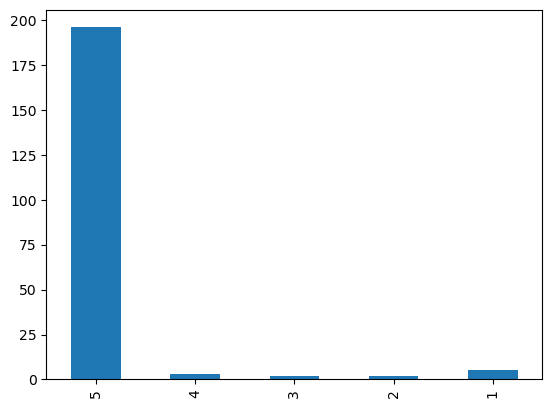

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot: title={'center': 'Restaurant Ratings'}, ylabel='rating'>

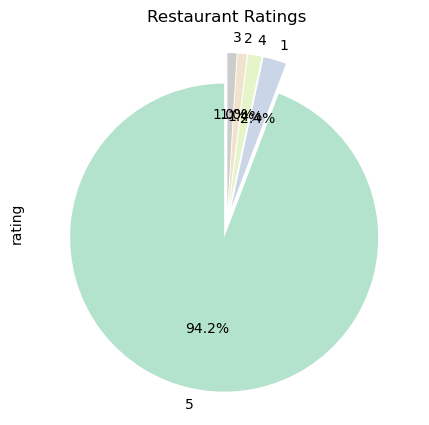

In [5]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

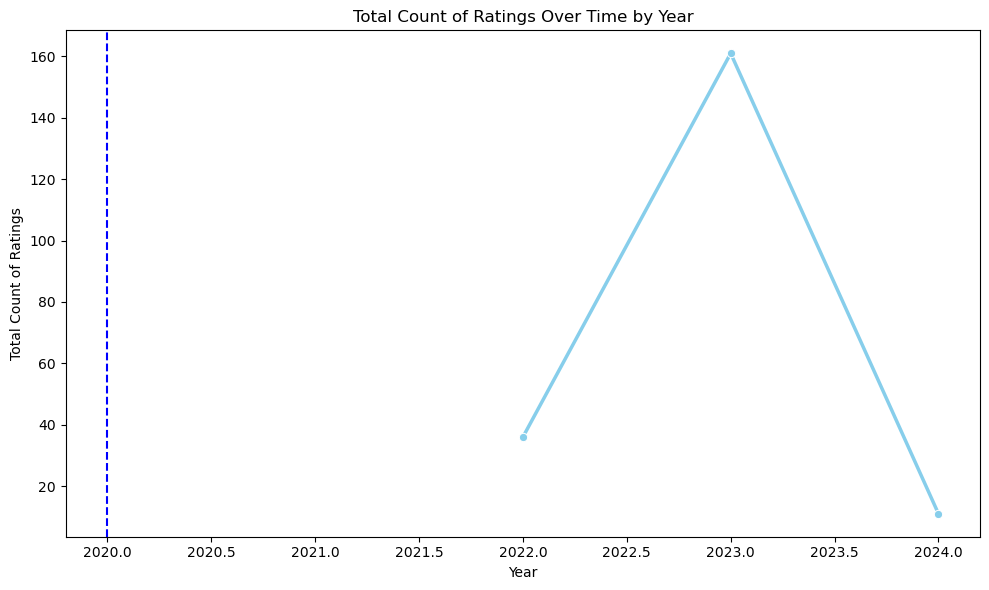

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2020, color='blue', linestyle='--', label='Year 2020')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

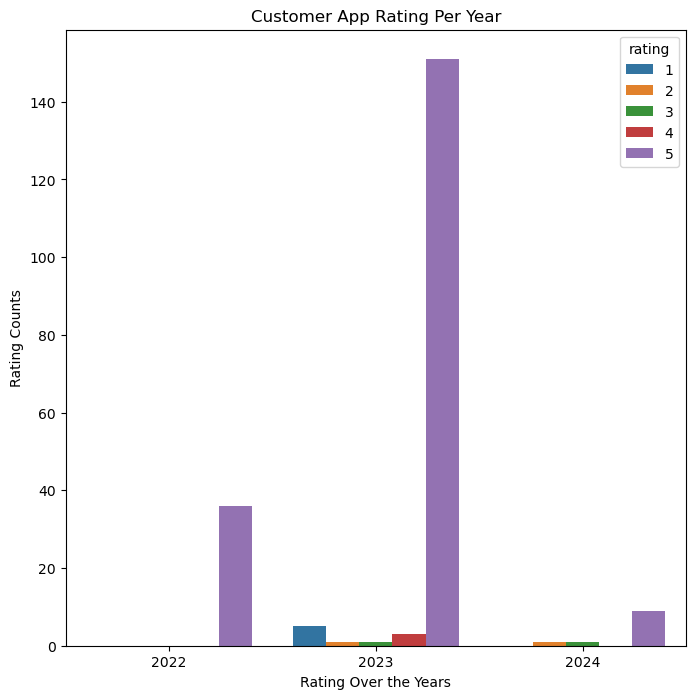

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_12970/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Its the worst place ever
1,Got the Philly on a Jamaican patty. I expected...
2,<NA>
3,Great people outstanding food i advise everyon...
4,Chop cheese sandwich was excellent
...,...
203,cant forget the bev!!!
204,Got me right the OCKY WAYYY!!
205,SHOOOOREEE SHOOOORRREEEE
206,The ock gave me what i needed. Shout out the ock


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [11]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_12970/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Red Hook Food Corp,2,Its the worst place ever,2024,worst place
1,Red Hook Food Corp,3,Got the Philly on a Jamaican patty. I expected...,2024,philli jamaican patti expect burst flavor bite...
2,Red Hook Food Corp,5,<NA>,2024,
3,Red Hook Food Corp,5,Great people outstanding food i advise everyon...,2024,great peopl outstand food advis check place
4,Red Hook Food Corp,5,Chop cheese sandwich was excellent,2024,chop chees sandwich excel


In [12]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('ocki', 64),
 ('neva', 42),
 ('sandwich', 40),
 ('food', 36),
 ('chees', 33),
 ('good', 27),
 ('ock', 25),
 ('chop', 23),
 ('great', 22),
 ('gener', 21),
 ('bev', 21),
 ('forget', 20),
 ('visit', 18),
 ('place', 14),
 ('experi', 14),
 ('love', 14),
 ('amaz', 13),
 ('recommend', 12),
 ('worth', 12),
 ('friendli', 11),
 ('make', 11),
 ('time', 10),
 ('nice', 10),
 ('chicken', 9),
 ('guy', 8),
 ('made', 8),
 ('jamaican', 7),
 ('patti', 7),
 ('disappoint', 7),
 ('egg', 7),
 ('delici', 7),
 ('super', 7),
 ('peopl', 6),
 ('wait', 6),
 ('star', 6),
 ('staff', 6),
 ('highli', 6),
 ('back', 6),
 ('dont', 6),
 ('fun', 6),
 ('bacon', 6),
 ('come', 6),
 ('person', 6),
 ('philli', 5),
 ('don', 5),
 ('thing', 5),
 ('hook', 5),
 ('ny', 5),
 ('store', 5),
 ('present', 5)]

In [13]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_12970/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Red Hook Food Corp,2,Its the worst place ever,2024,worst place,-1
1,Red Hook Food Corp,3,Got the Philly on a Jamaican patty. I expected...,2024,philli jamaican patti expect burst flavor bite...,0
2,Red Hook Food Corp,5,<NA>,2024,,1
3,Red Hook Food Corp,5,Great people outstanding food i advise everyon...,2024,great peopl outstand food advis check place,1
4,Red Hook Food Corp,5,Chop cheese sandwich was excellent,2024,chop chees sandwich excel,1
...,...,...,...,...,...,...
203,Red Hook Food Corp,5,cant forget the bev!!!,2022,forget bev,1
204,Red Hook Food Corp,5,Got me right the OCKY WAYYY!!,2022,ocki wayyy,1
205,Red Hook Food Corp,5,SHOOOOREEE SHOOOORRREEEE,2022,shooooree shoooorrreee,1
206,Red Hook Food Corp,5,The ock gave me what i needed. Shout out the ock,2022,ock gave need shout ock,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

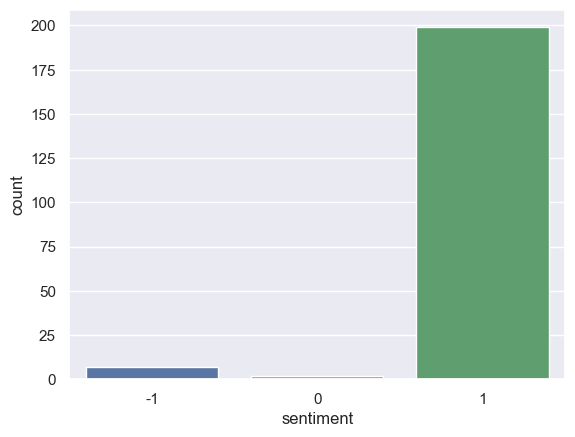

In [14]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_12970/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0     -0.6249
1      0.0000
2      0.0000
3      0.6249
4      0.4588
        ...  
203   -0.2263
204    0.0000
205    0.0000
206    0.0000
207    0.0000
Name: review_sentiment, Length: 208, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9423076923076923

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

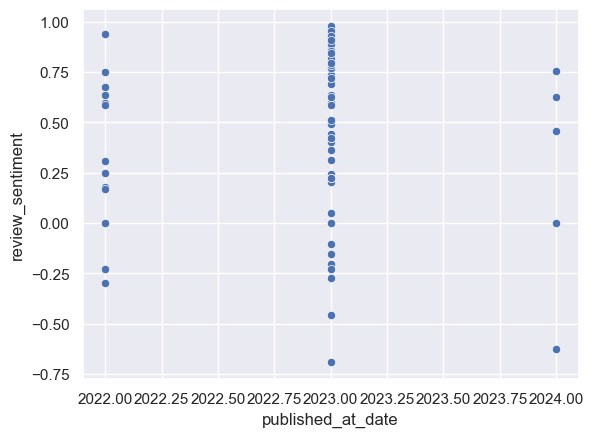

In [19]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot: xlabel='published_at_date', ylabel='review_sentiment'>

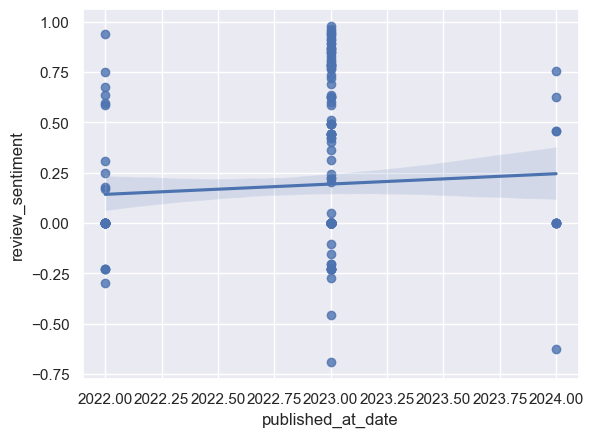

In [20]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

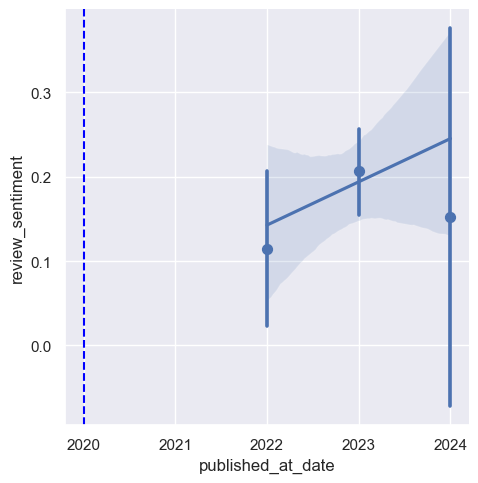

In [21]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2020, color='blue', linestyle='--', label='Year 2020')

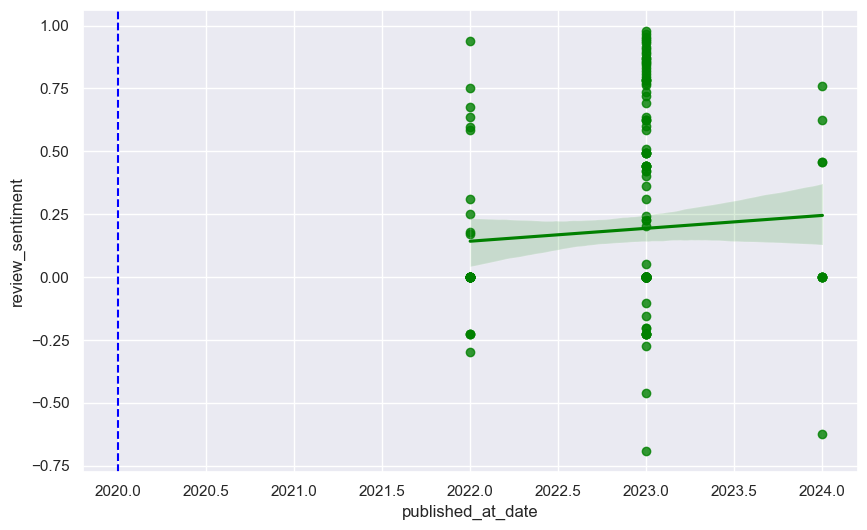

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2020, color='blue', linestyle='--', label='Year 2020')

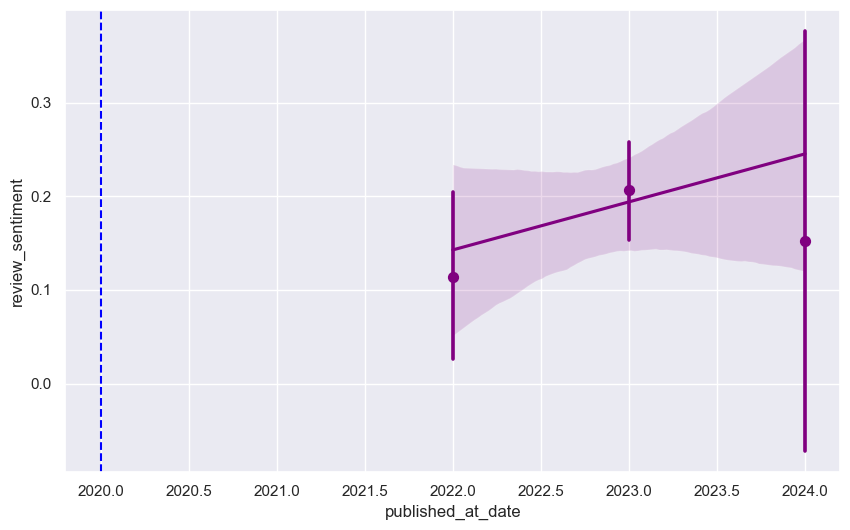

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2020, color='blue', linestyle='--', label='Year 2020')

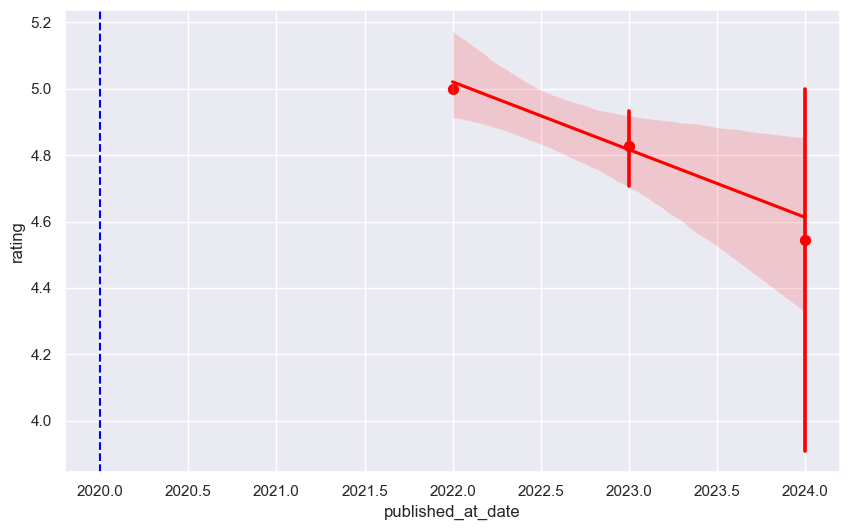

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2020, color='blue', linestyle='--', label='Year 2020')

In [23]:
# make altered data into csv file
df.to_csv('altdata/' + 'redhook.csv', index=False)